In [15]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt


### Read data

In [20]:
# Read monthly trade data
df = pd.read_csv('../data/processed/df_trade_filtered.csv')

# Convert the "Period" column to datetime
df['Period'] = pd.to_datetime(df['Period'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458532 entries, 0 to 458531
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Unnamed: 0    458532 non-null  int64         
 1   Period        458532 non-null  datetime64[ns]
 2   ReporterISO   458532 non-null  object        
 3   PartnerISO    458532 non-null  object        
 4   PrimaryValue  458532 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 17.5+ MB


In [21]:
# Show the count of record in each year
df['Period'].value_counts()


Period
2017-03-01    2959
2022-10-01    2959
2019-03-01    2947
2019-05-01    2945
2022-03-01    2928
              ... 
2024-02-01    2393
2010-01-01    2387
2012-01-01    2376
2024-01-01    2355
2024-03-01    2308
Name: count, Length: 171, dtype: int64

In [13]:
# Function to I
def create_network_for_period(df, period):
    # Filter data for the specific period
    period_data = df[df['Period'] == period]

    # Create a graph
    G = nx.Graph()

    # Add nodes and edges with trade values
    for _, row in period_data.iterrows():
        G.add_edge(row['ReporterISO'], row['PartnerISO'], weight=row['PrimaryValue'])



In [14]:
# Unique periods
periods = df['Period'].unique()

# Create and plot network for each period
for period in df.Period:
    create_network_for_period(df, period)

KeyboardInterrupt: 

In [18]:
import dynetx as dn

# Initialize a dynamic graph
DG = dn.DynGraph()

# Add edges with time intervals
for idx, row in df.iterrows():
    DG.add_interaction(row['ReporterISO'], row['PartnerISO'], t=row['Period'])

# Calculate temporal closeness centrality
temporal_closeness = dn.centrality.temporal_closeness_centrality(DG)

# Print temporal closeness centrality
print(temporal_closeness)


TypeError: Addition/subtraction of integers and integer-arrays with Timestamp is no longer supported.  Instead of adding/subtracting `n`, use `n * obj.freq`

In [ ]:
import matplotlib.animation as animation

fig, ax = plt.subplots()

def update(num):
    ax.clear()
    G = snapshots[time_slices[num]]
    pos = nx.spring_layout(G)
    nx.draw(G, pos, ax=ax, with_labels=True, node_size=500, edge_color='blue')
    ax.set_title(f'Time: {time_slices[num]}')

ani = animation.FuncAnimation(fig, update, frames=len(time_slices), repeat=False)
plt.show()


### Plot for network structure over time

In [7]:
import matplotlib.pyplot as plt

# Initialize lists to store the number of nodes and edges
num_nodes_list = []
num_edges_list = []

# Iterate through the subsets
for subset_name, subset_graph in network_sets.items():
    # Extract the year and month from the subset name
    period = int(subset_name.split('_')[1])
    year = period // 100
    month = period % 100
    period_str = f"{year}M{month:02d}"
    
    # Append the number of nodes and edges to the lists
    num_nodes_list.append((period_str, subset_graph.number_of_nodes()))
    num_edges_list.append((period_str, subset_graph.number_of_edges()))

# Sort the lists based on the period
num_nodes_list.sort(key=lambda x: x[0])
num_edges_list.sort(key=lambda x: x[0])

# Create two plots for the number of nodes and number of edges
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 7))

# Plot for the number of nodes
ax1.plot(*zip(*num_nodes_list), linestyle='-', color='blue')
ax1.set_xlabel('Period')
ax1.set_ylabel('Number of Nodes')

# Plot for the number of edges
ax2.plot(*zip(*num_edges_list), linestyle='-', color='green')
ax2.set_xlabel('Period')
ax2.set_ylabel('Number of Edges')

# Show labels for every 24 periods
x_ticks = num_nodes_list[::24]
ax1.set_xticks([x[0] for x in x_ticks])
ax1.set_xticklabels([x[0] for x in x_ticks], rotation=45)
ax2.set_xticks([x[0] for x in x_ticks])
ax2.set_xticklabels([x[0] for x in x_ticks], rotation=45)

plt.tight_layout()
plt.show()


ValueError: invalid literal for int() with base 10: '2015-01-01 00:00:00'

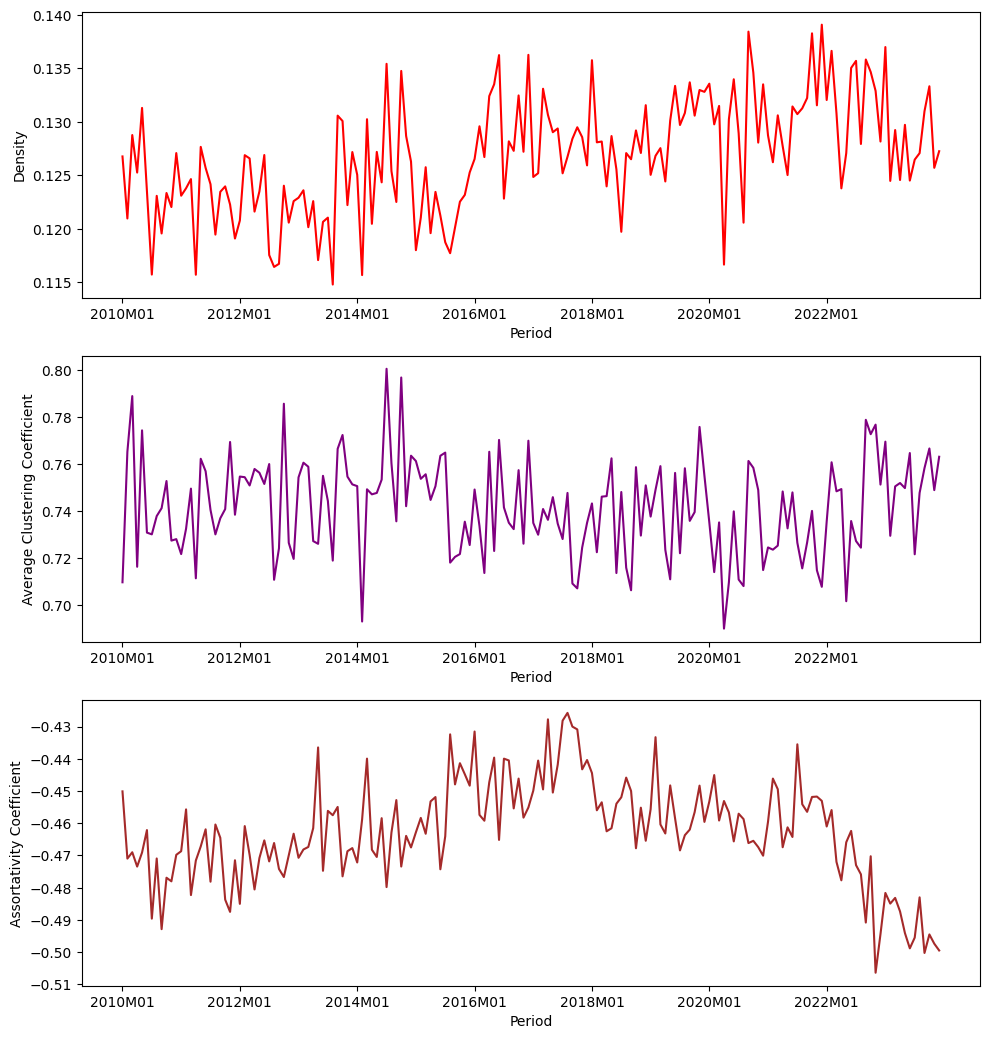

In [33]:


# Initialize lists to store the density, avg_clustering, assortativity
density_list = []
avg_clustering_list = []
assortativity_list = []

# Iterate through the subsets
for subset_name, subset_graph in network_sets.items():
    # Extract the year and month from the subset name
    period = int(subset_name.split('_')[1])
    year = period // 100
    month = period % 100
    period_str = f"{year}M{month:02d}"
    
    # Calculate the metrics and append to the lists
    density_list.append((period_str, nx.density(subset_graph)))
    avg_clustering_list.append((period_str, nx.average_clustering(subset_graph)))
    assortativity_list.append((period_str, nx.degree_assortativity_coefficient(subset_graph)))

# Sort the lists based on the period
density_list.sort(key=lambda x: x[0])
avg_clustering_list.sort(key=lambda x: x[0])
assortativity_list.sort(key=lambda x: x[0])

# Create subplots for the metrics
fig, axs = plt.subplots(3, 1, figsize=(10, 10.5))

# Plot for density
axs[0].plot(*zip(*density_list), linestyle='-', color='red')
axs[0].set_xlabel('Period')
axs[0].set_ylabel('Density')

# Plot for average clustering coefficient
axs[1].plot(*zip(*avg_clustering_list), linestyle='-', color='purple')
axs[1].set_xlabel('Period')
axs[1].set_ylabel('Average Clustering Coefficient')

# Plot for assortativity coefficient
axs[2].plot(*zip(*assortativity_list), linestyle='-', color='brown')
axs[2].set_xlabel('Period')
axs[2].set_ylabel('Assortativity Coefficient')

# Show labels for every 24 periods
x_ticks = density_list[::24]
for ax in axs:
    ax.set_xticks([x[0] for x in x_ticks])

plt.tight_layout()
plt.show()


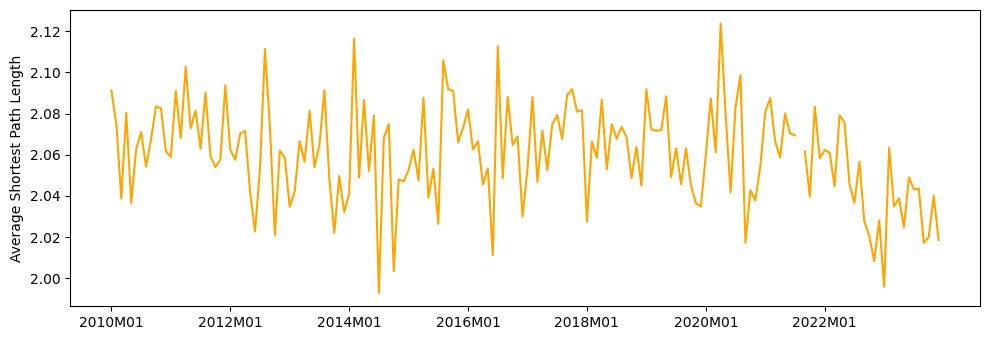

In [34]:
# Initialize lists to store avg shortest path length
avg_shortest_path_list = []

# Iterate through the subsets
for subset_name, subset_graph in network_sets.items():
    # Extract the year and month from the subset name
    period = int(subset_name.split('_')[1])
    year = period // 100
    month = period % 100
    period_str = f"{year}M{month:02d}"
    
    # Calculate the metrics and append to the lists
    # Check if the graph is connected before computing average shortest path
    if nx.is_connected(subset_graph):
        avg_shortest_path_list.append((period_str, nx.average_shortest_path_length(subset_graph)))
    else:
        avg_shortest_path_list.append((period_str, None))  # Mark as missing value for disconnected graphs
    
# Sort the lists based on the period
avg_shortest_path_list.sort(key=lambda x: x[0])

# Create a plot for average shortest path
fig, ax = plt.subplots(figsize=(10, 3.5))

# Plot for average shortest path length (considering missing values)
avg_shortest_path_values = [value if value is not None else float('nan') for _, value in avg_shortest_path_list]
ax.plot(*zip(*avg_shortest_path_list), linestyle='-', color='orange', label='Average Shortest Path')
ax.set_ylabel('Average Shortest Path Length')

# Show labels for every 24 periods
x_ticks = avg_shortest_path_list[::24]
ax.set_xticks([x[0] for x in x_ticks])

plt.tight_layout()
plt.show()

### Construct Structure properties matrix

In [35]:
# Create a DataFrame
properties = pd.DataFrame({
    'period': [item[0] for item in num_nodes_list], 
    'num_nodes': [item[1] for item in num_nodes_list],
    'num_edges': [item[1] for item in num_edges_list],
    'density': [item[1] for item in density_list],
    'clustering': [item[1] for item in avg_clustering_list],
    'assortativity': [item[1] for item in assortativity_list],
    'shortest_path': [item[1] for item in avg_shortest_path_list]
})

# Set 'period' as the index
properties.set_index('period', inplace=True)

# Save to csv
properties.to_csv('../data/processed/properties.csv',index=True)

In [36]:
# Get the descriptive table for properties
properties.describe()

,num_nodes,num_edges,density,clustering,assortativity,shortest_path
count,168.000000,168.000000,168.000000,168.000000,168.000000,167.000000
mean,183.077381,2113.880952,0.126835,0.741599,-0.462668,2.060240
std,4.038730,108.138845,0.005303,0.020330,0.015942,0.023723
min,172.000000,1879.000000,0.114772,0.689986,-0.506403,1.992972
25%,180.000000,2024.500000,0.123418,0.726372,-0.470955,2.045342
50%,183.000000,2134.000000,0.126890,0.741762,-0.462451,2.062001
75%,186.000000,2199.000000,0.130591,0.755750,-0.453105,2.075233
max,192.000000,2317.000000,0.139100,0.800450,-0.425765,2.123712


### Visualization

In [37]:
# Functions
def plot_network(G):
    # Calculate degree centrality for each node
    degree_centrality = nx.degree_centrality(G)
    
    # Define a threshold for degree centrality (adjust as needed)
    threshold = 0
    
    # Filter nodes with degree centrality above the threshold
    important_nodes = [node for node, centrality in degree_centrality.items() if centrality > threshold]
    
    # Create a subgraph with only important nodes and their edges
    G = G.subgraph(important_nodes)

    # Extract edge weights for scaling link widths
    edge_weights = [data['PrimaryValue'] for _, _, data in G.edges(data=True)]
    max_edge_weight = max(edge_weights)

    # Calculate normalized link widths based on weights
    edge_widths = [width / max_edge_weight * 5 for width in edge_weights]
    
    # Calculate node sizes based on degree centrality
    # node_sizes = [len(G[node]) * 10 for node in G.nodes()]

    # Set up colors for edges
    colors = [G[u][v].get('color', 'red') for u, v in G.edges()]

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8), dpi=80)

    # Visualization 1
    pos_attrs1 = {}
    circPos1 = nx.shell_layout(G)
    for node, coords in circPos1.items():
        pos_attrs1[node] = (coords[0] + 0.01, coords[1] - 0.05)
    nx.draw_networkx_labels(G, pos=circPos1, ax=axes[0])
    nx.draw(G, pos=pos_attrs1, node_size=100, ax=axes[0], edge_color=colors, width=edge_widths)
    axes[0].set_title('Visualization 1')

    # Visualization 2
    pos_attrs2 = {}
    circPos2 = nx.spring_layout(G, k=0.2, iterations=20)
    for node, coords in circPos2.items():
        pos_attrs2[node] = (coords[0] + 0.01, coords[1] - 0.05)
    nx.draw_networkx_labels(G, pos=circPos2, ax=axes[1])
    nx.draw(G, pos=pos_attrs2, node_size=50, ax=axes[1], edge_color=colors, width=edge_widths)
    axes[1].set_title('Visualization 2')

    plt.tight_layout()
    plt.show()

# Big increase in 2010M1
# plot_network(G_200001)
plot_network(network_sets['period_200001'])
plot_network(network_sets['period_200701'])
plot_network(network_sets['period_201001'])
plot_network(network_sets['period_201701'])
plot_network(network_sets['period_202301'])

KeyError: 'period_200001'

### Case study on importance nodes - centrality measures

In [ ]:

# Nodes of interest
nodes_of_interest = ['USA', 'TWN', 'KOR']

# Initialize lists to store centrality measures
degree_centrality_list = {node: [] for node in nodes_of_interest}
betweenness_centrality_list = {node: [] for node in nodes_of_interest}
closeness_centrality_list = {node: [] for node in nodes_of_interest}

# Iterate through the subsets
for subset_name, subset_graph in network_sets.items():
    # Extract the year and month from the subset name
    period = int(subset_name.split('_')[1])
    year = period // 100
    month = period % 100
    period_str = f"{year}M{month}"
    
    # Calculate centrality measures for each node of interest
    for node in nodes_of_interest:
        degree_centrality_list[node].append((period_str, nx.degree_centrality(subset_graph)[node]))
        betweenness_centrality_list[node].append((period_str, nx.betweenness_centrality(subset_graph)[node]))
        closeness_centrality_list[node].append((period_str, nx.closeness_centrality(subset_graph)[node]))

# Sort the lists based on the period
for node in nodes_of_interest:
    degree_centrality_list[node].sort(key=lambda x: x[0])
    betweenness_centrality_list[node].sort(key=lambda x: x[0])
    closeness_centrality_list[node].sort(key=lambda x: x[0])

# Create subplots for each centrality measure
fig, axs = plt.subplots(3, 1, figsize=(10, 10.5))

# Plot for degree centrality
for node in nodes_of_interest:
    axs[0].plot(*zip(*degree_centrality_list[node]), linestyle='-', label=node)
axs[0].set_ylabel('Degree Centrality')
axs[0].legend()

# Plot for betweenness centrality
for node in nodes_of_interest:
    axs[1].plot(*zip(*betweenness_centrality_list[node]), linestyle='-', label=node)
axs[1].set_ylabel('Betweenness Centrality')
axs[1].legend()

# Plot for closeness centrality
for node in nodes_of_interest:
    axs[2].plot(*zip(*closeness_centrality_list[node]), linestyle='-', label=node)
axs[2].set_xlabel('Period')
axs[2].set_ylabel('Closeness Centrality')
axs[2].legend()

# Show labels for every 24 periods
x_ticks = degree_centrality_list[nodes_of_interest[0]][::24]
for ax in axs:
    ax.set_xticks([x[0] for x in x_ticks])

plt.tight_layout()
plt.show()
